# Import

In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [395]:
def etude_fichier(df):
    # Etude du fichier 
    print("Nombre de colonnes :", df.shape)
    print()
    print("Le type est : \n", df.dtypes)
    print()
    print('Nombre de unique')
    print(df.nunique())
    print()
    print('le nombre de null est :\n',df.isnull().sum())

In [396]:
customers = pd.read_csv('customersv2.csv', delimiter=';')
transactions = pd.read_csv('Transactionsv2.csv',delimiter=';')
products = pd.read_csv('productsv2.csv',delimiter=';')

## customers

In [397]:
customers.head()

,52,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [398]:
etude_fichier(customers)

Nombre de colonnes : (8621, 3)

Le type est : 
 52       object
sex      object
birth     int64
dtype: object

Nombre de unique
52       8621
sex         2
birth      76
dtype: int64

le nombre de null est :
 52       0
sex      0
birth    0
dtype: int64


In [399]:
customers.rename(columns={'52' : 'client_id'}, inplace=True)

## transactions

In [400]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [401]:
etude_fichier(transactions)

Nombre de colonnes : (687534, 4)

Le type est : 
 id_prod       object
date          object
session_id    object
client_id     object
dtype: object

Nombre de unique
id_prod         3265
date          687419
session_id    345505
client_id       8600
dtype: int64

le nombre de null est :
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


## products

In [402]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [403]:
etude_fichier(products)

Nombre de colonnes : (3286, 3)

Le type est : 
 id_prod     object
price      float64
categ        int64
dtype: object

Nombre de unique
id_prod    3286
price      1454
categ         3
dtype: int64

le nombre de null est :
 id_prod    0
price      0
categ      0
dtype: int64


# Liaison

In [404]:
df = pd.merge(products, transactions, on='id_prod', how='left')

In [405]:
dft = pd.merge(df, customers, on='client_id',how='left')

# DFT

## Manipulation DFT

In [406]:
dft.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972.0
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967.0
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936.0
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989.0
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981.0


In [407]:
etude_fichier(dft)

Nombre de colonnes : (687555, 8)

Le type est : 
 id_prod        object
price         float64
categ           int64
date           object
session_id     object
client_id      object
sex            object
birth         float64
dtype: object

Nombre de unique
id_prod         3286
price           1454
categ              3
date          687419
session_id    345505
client_id       8600
sex                2
birth             76
dtype: int64

le nombre de null est :
 id_prod        0
price          0
categ          0
date          21
session_id    21
client_id     21
sex           21
birth         21
dtype: int64


In [408]:
dft = dft.dropna()

In [409]:
# Conversion de la colonne "birth" en format année
dft['birth'] = pd.to_numeric(dft['birth'], errors='coerce').astype(pd.Int64Dtype()) # Convertir en type entier
# Convertir la colonne "date" en format de date
dft['date'] = pd.to_datetime(dft['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
# Calcul de l'âge
current_year = datetime.now().year
dft['age'] = current_year - dft['birth']

# Affichage des résultats
print(dft['age'])


0         51
1         56
2         87
3         34
4         42
          ..
687550    35
687551    36
687552    34
687553    34
687554    34
Name: age, Length: 687534, dtype: Int64


In [410]:
# Définition des intervalles d'âge
intervalles = [0, 18, 30, 40, 50, 60, 70, float('inf')]
tranche = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']

# Création de la colonne "age_group" avec les tranches d'âge
dft['tranche'] = pd.cut(dft['age'], bins=intervalles, labels=tranche, right=False)

# Affichage des résultats
print(dft['tranche'])

0         51-60
1         51-60
2           70+
3         31-40
4         41-50
          ...  
687550    31-40
687551    31-40
687552    31-40
687553    31-40
687554    31-40
Name: tranche, Length: 687534, dtype: category
Categories (7, object): ['0-18' < '19-30' < '31-40' < '41-50' < '51-60' < '61-70' < '70+']


In [411]:
dft.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,tranche
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,51,51-60
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967,56,51-60
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936,87,70+
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989,34,31-40
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981,42,41-50


In [412]:
dft['age'] = pd.to_numeric(dft['age'], errors='coerce')
dft['categ'] = dft['categ'].astype(str)

In [413]:
def assign_profile(row):
    age = row['age']
    sex = row['sex']
    tranche = row['tranche']
    
    if age < 30:
        if sex == 'm':
            if tranche == '0-18':
                return 'Jeune Homme Adolescent'
            else:
                return 'Jeune Homme Jeune Adulte'
        else:
            if tranche == '0-18':
                return 'Jeune Femme Adolescent'
            else:
                return 'Jeune Femme Jeune Adulte'
    elif age < 40:
        if sex == 'm':
            if tranche == '19-30':
                return 'Homme Jeune Adulte'
            elif tranche == '31-40':
                return 'Homme Adulte'
            else:
                return 'Homme ' + tranche
        else:
            if tranche == '19-30':
                return 'Femme Jeune Adulte'
            elif tranche == '31-40':
                return 'Femme Adulte'
            else:
                return 'Femme ' + tranche
    else:
        if sex == 'm':
            if tranche == '41-50':
                return 'Homme d\'Âge Moyen'
            elif tranche == '51-60':
                return 'Homme Mûr'
            elif tranche == '61-70':
                return 'Homme Senior'
            else:
                return 'Homme ' + tranche
        else:
            if tranche == '41-50':
                return 'Femme d\'Âge Moyen'
            elif tranche == '51-60':
                return 'Femme Mûre'
            elif tranche == '61-70':
                return 'Femme Senior'
            else:
                return 'Femme ' + tranche

# Appliquer la fonction d'assignation de profil à chaque ligne du DataFrame
dft['profil'] = dft.apply(assign_profile, axis=1)

In [414]:
dft.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,tranche,profil
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,51,51-60,Homme Mûr
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967,56,51-60,Femme Mûre
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936,87,70+,Femme 70+
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989,34,31-40,Femme Adulte
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981,42,41-50,Homme d'Âge Moyen


In [415]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687534 entries, 0 to 687554
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   price       687534 non-null  float64       
 2   categ       687534 non-null  object        
 3   date        687298 non-null  datetime64[ns]
 4   session_id  687534 non-null  object        
 5   client_id   687534 non-null  object        
 6   sex         687534 non-null  object        
 7   birth       687534 non-null  Int64         
 8   age         687534 non-null  Int64         
 9   tranche     687534 non-null  category      
 10  profil      687534 non-null  object        
dtypes: Int64(2), category(1), datetime64[ns](1), float64(1), object(6)
memory usage: 59.7+ MB


# Graphique du ca

##  évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance golbale

In [416]:
# Regrouper les données par mois et calculer le chiffre d'affaires total par mois
vente_mois = dft.groupby(pd.Grouper(key='date', freq='M')).sum()['price']
vente_mois.head()

date
2021-03-31    482440.61
2021-04-30    476109.30
2021-05-31    492943.47
2021-06-30    484088.56
2021-07-31    482835.40
Name: price, dtype: float64

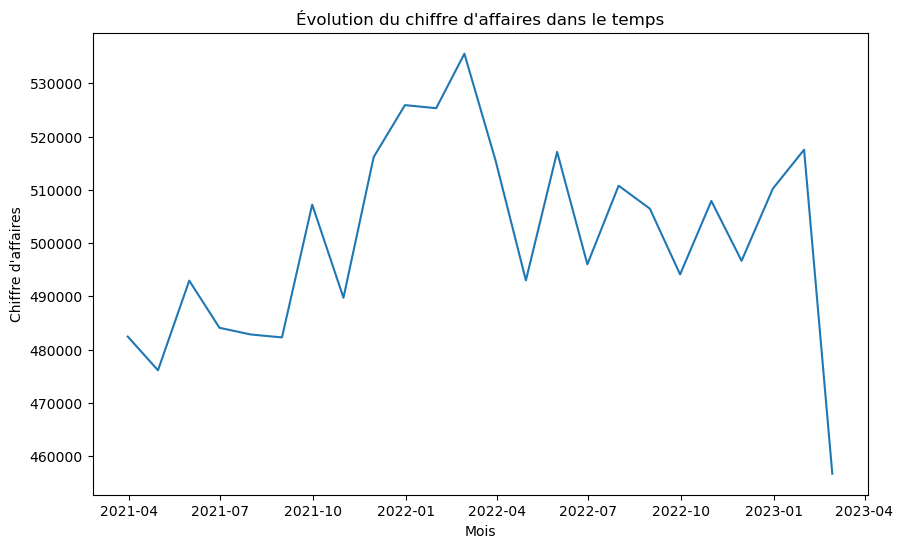

In [417]:
# Tracer l'évolution du chiffre d'affaires dans le temps
plt.figure(figsize=(10, 6))
plt.plot(vente_mois.index, vente_mois.values)
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires')
plt.title('Évolution du chiffre d\'affaires dans le temps')
plt.show()

La moyenne mobile, ou moyenne glissante, est un type de moyenne statistique utilisée pour analyser des séries ordonnées de données, le plus souvent des séries temporelles, en supprimant les fluctuations transitoires de façon à en souligner les tendances à plus long terme. Cette moyenne est dite mobile parce qu'elle est recalculée de façon continue,

<Figure size 1000x800 with 0 Axes>

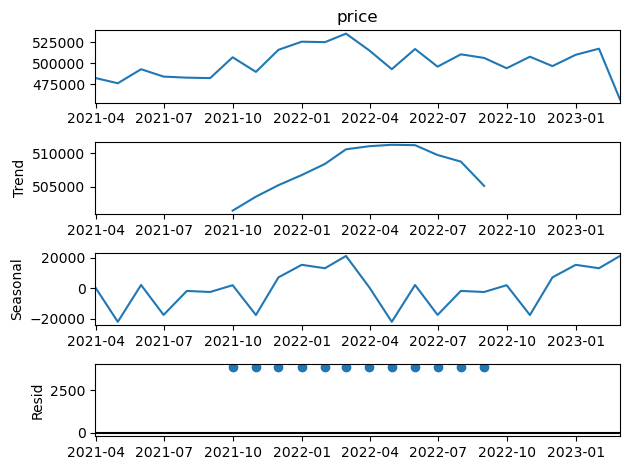

In [418]:
# Décomposition en moyenne mobile simple sur 12 mois
rolling_mean = vente_mois.rolling(window=12).mean()

# Tracer la décomposition en moyenne mobile
decomposition = seasonal_decompose(vente_mois, model='additive')
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()

##  un zoom sur les réfrences pour voir top et flop

In [419]:
# Références les plus vendues (top)
top_references = dft.groupby('id_prod').sum()['price'].nlargest(10)
print('Références les plus vendues :\n', top_references)
print()
# Références les moins vendues (flop)
flop_references = dft.groupby('id_prod').sum()['price'].nsmallest(10)
print('Références les moins vendues :\n', flop_references)

Références les plus vendues :
 id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    56617.47
1_369    56136.60
2_110    53846.25
1_383    53834.43
1_414    53522.18
Name: price, dtype: float64

Références les moins vendues :
 id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_1601    1.99
0_541     1.99
0_807     1.99
0_1728    2.27
0_1498    2.48
0_898     2.54
0_1840    2.56
Name: price, dtype: float64


## répartition du CA par catégorie

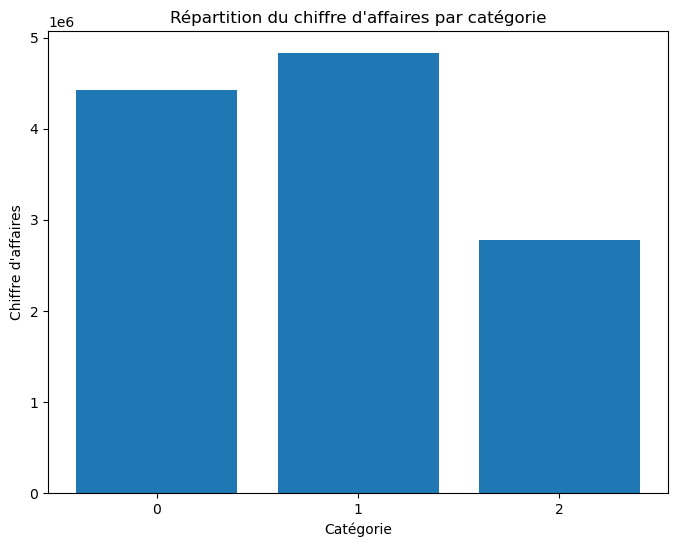

In [420]:
# Répartition par catégorie
category_sales = dft.groupby('categ').sum()['price']
plt.figure(figsize=(8, 6))
plt.bar(category_sales.index, category_sales.values)
plt.xlabel('Catégorie')
plt.ylabel('Chiffre d\'affaires')
plt.title('Répartition du chiffre d\'affaires par catégorie')
plt.show()

## info sur les profils de nos clients, répartition du ca entre eux

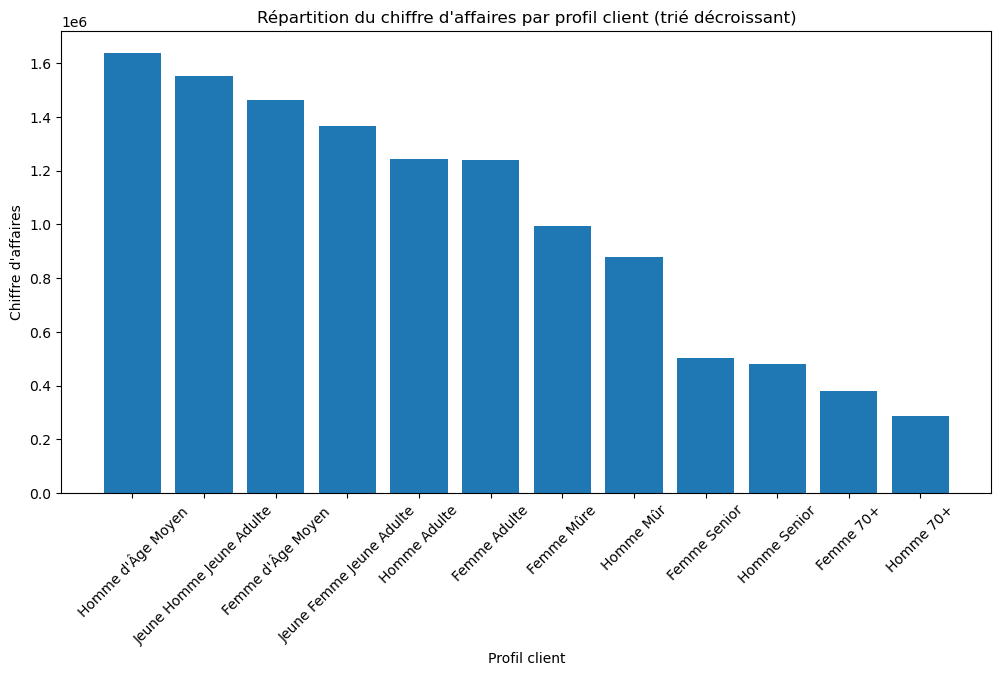

In [421]:
# Calcul du chiffre d'affaires par profil
profil_sales = dft.groupby('profil')['price'].sum()

# Trier le DataFrame dans l'ordre décroissant
profil_sales_sorted = profil_sales.sort_values(ascending=False)

# Affichage du diagramme à barres trié
plt.figure(figsize=(12, 6))
plt.bar(profil_sales_sorted.index, profil_sales_sorted.values)
plt.xlabel('Profil client')
plt.ylabel('Chiffre d\'affaires')
plt.title('Répartition du chiffre d\'affaires par profil client (trié décroissant)')
plt.xticks(rotation=45)
plt.show()

## Courbe de lorenz

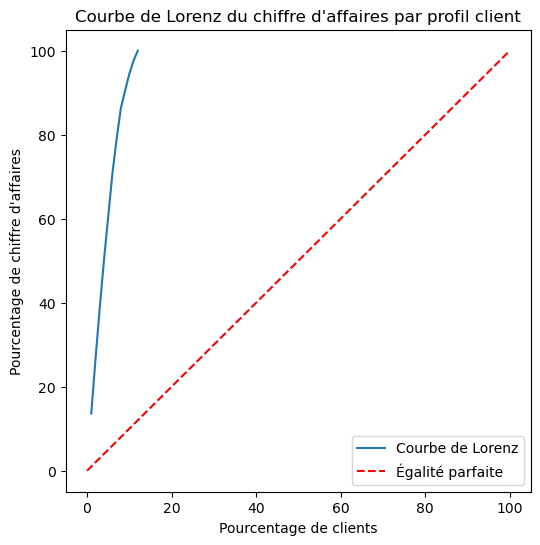

In [422]:
import pandas as pd
import matplotlib.pyplot as plt

# Tri des ventes par profil dans l'ordre décroissant
profil_sales_sorted = profil_sales.sort_values(ascending=False)

# Calcul du chiffre d'affaires cumulé par profil
cumulative_sales = profil_sales_sorted.cumsum()

# Calcul du pourcentage du chiffre d'affaires cumulé par profil
cumulative_sales_percentage = cumulative_sales / profil_sales.sum() * 100

# Création de la série Pandas avec les pourcentages du chiffre d'affaires cumulé
lorenz_curve = pd.Series(cumulative_sales_percentage.values, index=range(1, len(cumulative_sales_percentage) + 1))

# Affichage de la courbe de Lorenz
plt.figure(figsize=(6, 6))
plt.plot(lorenz_curve.index, lorenz_curve.values, label='Courbe de Lorenz')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Égalité parfaite')
plt.xlabel('Pourcentage de clients')
plt.ylabel('Pourcentage de chiffre d\'affaires')
plt.title('Courbe de Lorenz du chiffre d\'affaires par profil client')
plt.legend()
plt.show()


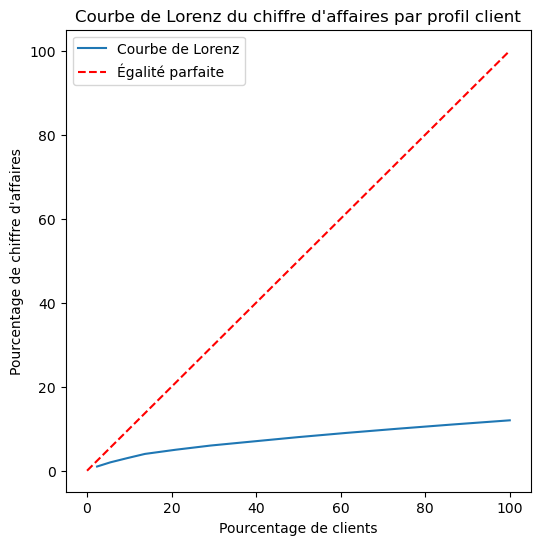

In [444]:
# Calcul du chiffre d'affaires cumulé par profil
cumulative_sales = profil_sales.sort_values().cumsum() / profil_sales.sum()

# Calcul du pourcentage du chiffre d'affaires cumulé par profil
cumulative_sales_percentage = cumulative_sales * 100

# Création de la série Pandas avec les pourcentages du chiffre d'affaires cumulé
lorenz_curve = pd.Series(cumulative_sales_percentage.values, index=range(1, len(cumulative_sales_percentage) + 1))

#  Affichage de la courbe de Lorenz
plt.figure(figsize=(6, 6))
plt.plot(lorenz_curve.values, lorenz_curve.index, label='Courbe de Lorenz')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Égalité parfaite')
plt.xlabel('Pourcentage de clients')
plt.ylabel('Pourcentage de chiffre d\'affaires')
plt.title('Courbe de Lorenz du chiffre d\'affaires par profil client')
plt.legend()
plt.show()

# Corrélations

## le lien entre le genre d'un client et les catégories de livres achetées

In [424]:
# Grouper les données par 'sex' et 'categ', puis compter le nombre de produits dans chaque groupe
category_counts = dft.groupby(['sex', 'categ']).count()['id_prod']

category_counts

sex  categ
f    0        206103
     1        119307
     2         17283
m    0        209356
     1        116285
     2         19200
Name: id_prod, dtype: int64

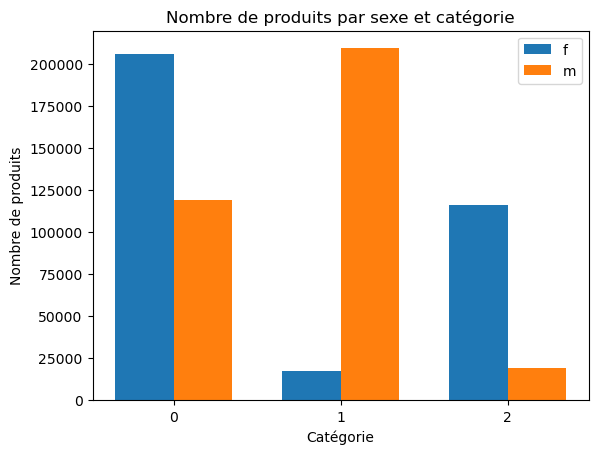

In [425]:
# Données
category_counts = [206103, 119307, 17283, 209356, 116285, 19200]
categories = ['0', '1', '2']
sexes = ['f', 'm']

# Configuration du graphique
x = range(len(categories))
width = 0.35

# Création du graphique à barres
fig, ax = plt.subplots()
for i, sex in enumerate(sexes):
    ax.bar([val + i * width for val in x], category_counts[i::len(sexes)], width, label=sex)

# Paramètres du graphique
ax.set_xlabel('Catégorie')
ax.set_ylabel('Nombre de produits')
ax.set_title('Nombre de produits par sexe et catégorie')
ax.set_xticks([val + width / 2 for val in x])
ax.set_xticklabels(categories)
ax.legend()

# Affichage du graphique
plt.show()

In [426]:

# Création d'un tableau de contingence
contingency_table = pd.crosstab(dft['sex'], dft['categ'])
print(contingency_table)
# Application du test du Chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)
print()
print(f"Valeur de Chi2 : {chi2}")
print(f"P-valeur : {p}")


categ       0       1      2
sex                         
f      206103  119307  17283
m      209356  116285  19200

Valeur de Chi2 : 158.25417617304882
P-valeur : 4.320582228399707e-35


Ces résultats indiquent que le test du Chi-carré a trouvé une association statistiquement significative entre le sexe du client et la catégorie de produits qu'ils achètent.

La valeur de Chi2 est assez élevée, ce qui indique une forte déviation par rapport à ce que nous attendrions si les deux variables étaient indépendantes. De plus, la p-valeur est extrêmement petite (bien en dessous du seuil standard de 0,05), ce qui signifie que le résultat est très probablement statistiquement significatif et non dû au hasard.

En conclusion, sur la base de ces résultats, il semble qu'il existe une corrélation entre le sexe d'un client et la catégorie de produits qu'il achète. Cependant, gardez à l'esprit que cela ne signifie pas nécessairement qu'il y a une relation de cause à effet. D'autres facteurs pourraient être à l'œuvre. Pour comprendre le contexte de cette corrélation, vous devriez probablement examiner d'autres aspects de vos données ou réaliser une analyse plus détaillée.

## le lien entre l'âge des clients et le montant total des achats

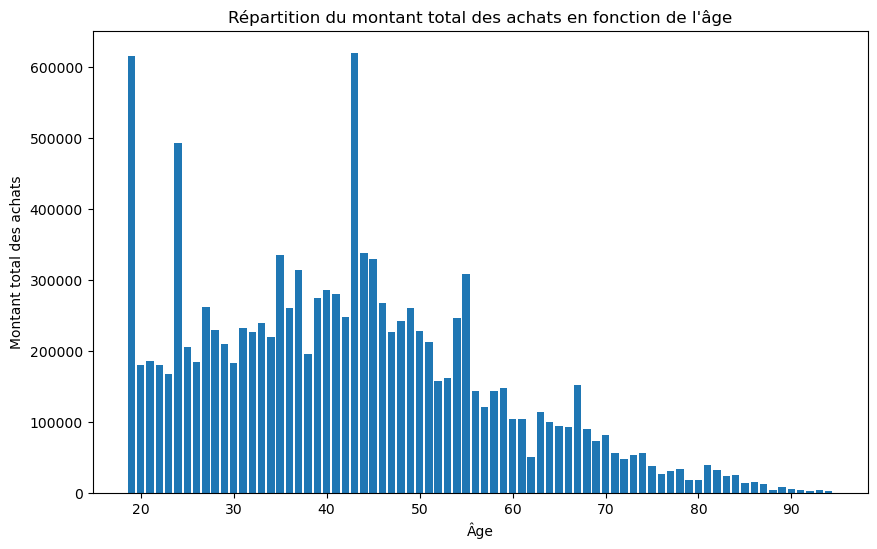

In [427]:
import matplotlib.pyplot as plt

# Grouper les données par âge et calculer la somme du montant total des achats
age_total_purchase = dft.groupby('age')['price'].sum()

# Obtenir les valeurs d'âge et les montants totaux des achats
ages = age_total_purchase.index
purchase_totals = age_total_purchase.values

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(ages, purchase_totals)
plt.xlabel('Âge')
plt.ylabel('Montant total des achats')
plt.title('Répartition du montant total des achats en fonction de l\'âge')

plt.show()

In [428]:
# Assurer que les données sont numériques et non NaN
dft['age'] = pd.to_numeric(dft['age'], errors='coerce')
dft['price'] = pd.to_numeric(dft['price'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'age' et 'price'
dft = dft.dropna(subset=['age', 'price'])

# Calculer la corrélation et la p-valeur
corr, p_value = pearsonr(dft['age'], dft['price'])
print('Correlation: ', corr)
print('P-value: ', p_value)

Correlation:  -0.20749608778813317
P-value:  0.0


La corrélation entre l'âge des clients et le montant total des achats est de -0.20749608778813317, ce qui indique une corrélation négative faible. Le p-value est de 0.0, ce qui suggère que cette corrélation est statistiquement significative. Cela signifie qu'il existe une relation significative entre l'âge des clients et le montant total des achats, mais la corrélation est faible.

Veuillez noter que cette corrélation ne capture qu'une relation linéaire entre les deux variables et d'autres facteurs peuvent également influencer le montant total des achats. Il peut être utile d'explorer d'autres techniques d'analyse pour mieux comprendre la relation entre ces variables.

## le lien entre l'age des clients et la fréquence d'achat

In [429]:
# Calculer la fréquence d'achat pour chaque client
purchase_frequency = dft.groupby('client_id').size()

# Nommer la série
purchase_frequency.name = 'purchase_frequency'

# Joindre cette information à votre dataframe client
dft = dft.join(purchase_frequency, on='client_id')

In [430]:
dft.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,tranche,profil,purchase_frequency
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,51,51-60,Homme Mûr,51
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967,56,51-60,Femme Mûre,62
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936,87,70+,Femme 70+,105
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989,34,31-40,Femme Adulte,94
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981,42,41-50,Homme d'Âge Moyen,243


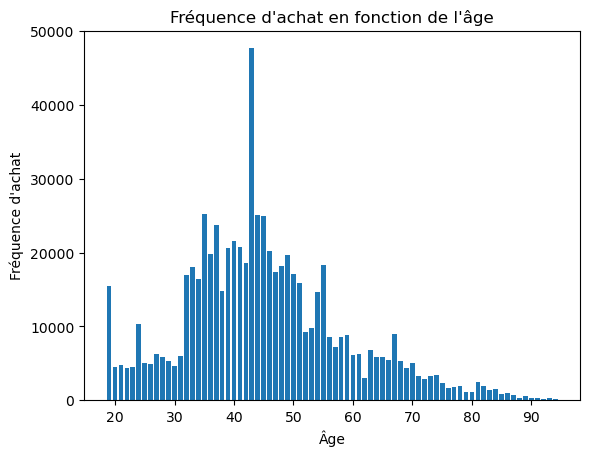

In [431]:
# Grouper les données par âge et compter le nombre d'achats dans chaque groupe
age_counts = dft.groupby('age').count()['id_prod']

# Créer le graphique
fig, ax = plt.subplots()
ax.bar(age_counts.index, age_counts.values)

# Paramètres du graphique
ax.set_xlabel('Âge')
ax.set_ylabel('Fréquence d\'achat')
ax.set_title('Fréquence d\'achat en fonction de l\'âge')

# Affichage du graphique
plt.show()

In [432]:
corr, p_value = pearsonr(dft['age'], dft['purchase_frequency'])
print('Correlation: ', corr)
print('P-value: ', p_value)

Correlation:  -0.018499587076114953
P-value:  4.0869183212253217e-53


La corrélation de Pearson entre l'âge des clients et la fréquence d'achat est de -0.0185, ce qui indique une faible corrélation négative. La p-valeur associée est très faible (4.09e-53), ce qui suggère une corrélation significative entre l'age et la fréquence d'achat

## le lien entre l'age du client et la taille du panier moyen

In [433]:
# Calculer le panier moyen par l'age du client
average_basket_by_profile = dft.groupby('age')['price'].mean()

print(average_basket_by_profile)
# Créer un dictionnaire à partir de la série "average_basket_by_profile"
average_basket_dict = average_basket_by_profile.to_dict()

# Ajouter la colonne "average_basket_size" à votre DataFrame "dft"
dft['average_basket_size'] = dft['age'].map(average_basket_dict)


age
19    39.776612
20    40.231772
21    39.650144
22    41.396430
23    36.959170
        ...    
90    16.303065
91    16.215321
92    16.561471
93    17.862269
94    16.088317
Name: price, Length: 76, dtype: float64


In [434]:
dft.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,tranche,profil,purchase_frequency,average_basket_size
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,51,51-60,Homme Mûr,51,13.370291
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967,56,51-60,Femme Mûre,62,16.806677
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936,87,70+,Femme 70+,105,16.850812
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989,34,31-40,Femme Adulte,94,13.370611
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981,42,41-50,Homme d'Âge Moyen,243,13.352637


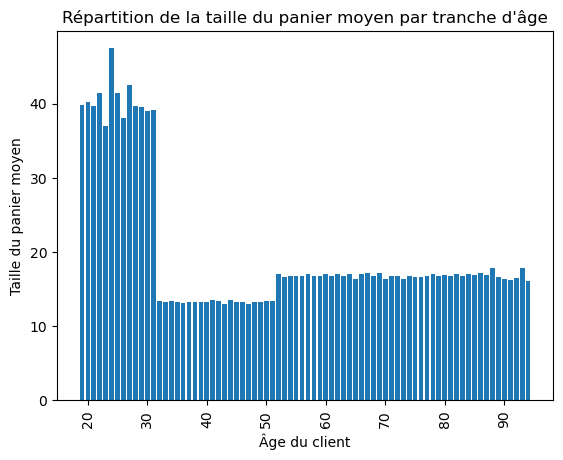

In [435]:
average_basket_by_age = dft.groupby('age')['average_basket_size'].mean()

#Créer un graphique à barres pour représenter la répartition de la taille du panier moyen par tranche d'âge
plt.bar(average_basket_by_age.index, average_basket_by_age)
plt.xlabel("Âge du client")
plt.ylabel("Taille du panier moyen")
plt.title("Répartition de la taille du panier moyen par tranche d'âge")
plt.xticks(rotation=90)
plt.show()

In [436]:
# Assurer que les données sont numériques et non NaN
dft['age'] = pd.to_numeric(dft['age'], errors='coerce')
dft['average_basket_size'] = pd.to_numeric(dft['average_basket_size'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes
dft = dft.dropna(subset=['age', 'average_basket_size'])

# Calculer la corrélation et la p-valeur
corr, p_value = pearsonr(dft['age'], dft['average_basket_size'])
print('Correlation: ', corr)
print('P-value: ', p_value)


Correlation:  -0.4326387426179492
P-value:  0.0


La corrélation entre l'âge du client et la taille du panier moyen est de -0.4326, ce qui indique une corrélation négative modérée. La p-valeur est de 0.0, ce qui suggère que cette corrélation est statistiquement significative. Cela signifie qu'il existe une relation significative entre l'âge du client et la taille de son panier moyen.

## le lien entre l'age et la catégorie de livre achetés

In [437]:
category_counts = dft.groupby(['age', 'categ']).count()['id_prod']
print(category_counts)

age  categ
19   0        3418
     1        6067
     2        6012
20   0         909
     1        1798
              ... 
93   1         161
     2           2
94   0          78
     1         123
     2           1
Name: id_prod, Length: 228, dtype: int64


In [438]:
tranche_order = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']

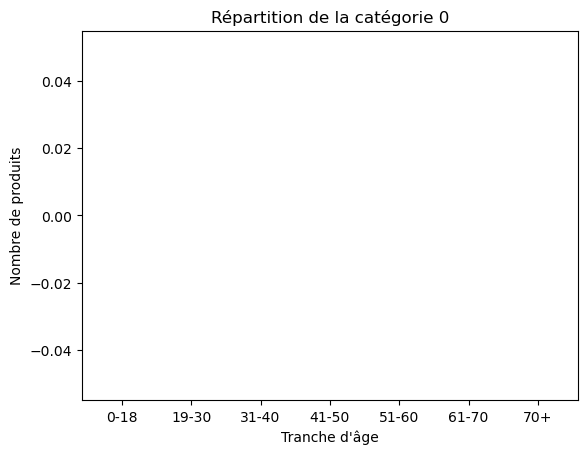

In [439]:
# Filtrer les données pour la catégorie 0
category_0 = dft[dft['categ'] == 0]

# Grouper les données par tranche d'âge et compter le nombre de produits dans chaque groupe
category_0_counts = category_0.groupby('tranche')['id_prod'].count()

# Créer les positions des tranches d'âge sur l'axe x
x = np.arange(len(tranche_order))

# Créer la figure et l'axe
fig, ax = plt.subplots()

# Créer les barres
ax.bar(x, category_0_counts, width=0.5, color='red')

# Définir les étiquettes de l'axe x et le titre du graphique
ax.set_xticks(x)
ax.set_xticklabels(tranche_order)
ax.set_xlabel('Tranche d\'âge')
ax.set_ylabel('Nombre de produits')
ax.set_title('Répartition de la catégorie 0')

# Afficher le graphique
plt.show()

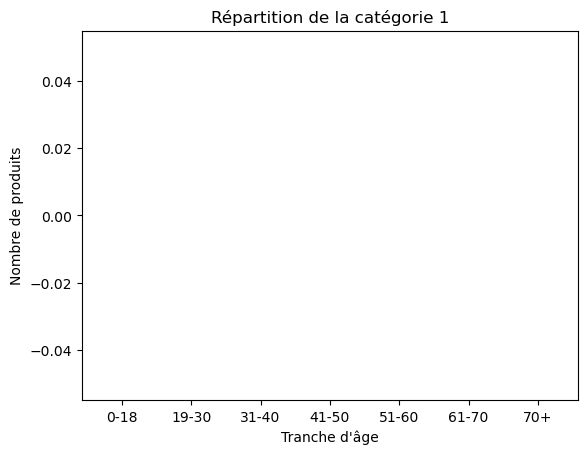

In [440]:
# Filtrer les données pour la catégorie 1
category_1 = dft[dft['categ'] == 1]

# Grouper les données par tranche d'âge et compter le nombre de produits dans chaque groupe
category_1_counts = category_1.groupby('tranche').count()['id_prod']

# Créer les positions des tranches d'âge sur l'axe x
x = np.arange(len(tranche_order))

# Créer la figure et l'axe
fig, ax = plt.subplots()

# Créer les barres
ax.bar(x, category_1_counts, width=0.5, color='blue')

# Définir les étiquettes de l'axe x et le titre du graphique
ax.set_xticks(x)
ax.set_xticklabels(tranche_order)
ax.set_xlabel('Tranche d\'âge')
ax.set_ylabel('Nombre de produits')
ax.set_title('Répartition de la catégorie 1')

# Afficher le graphique
plt.show()


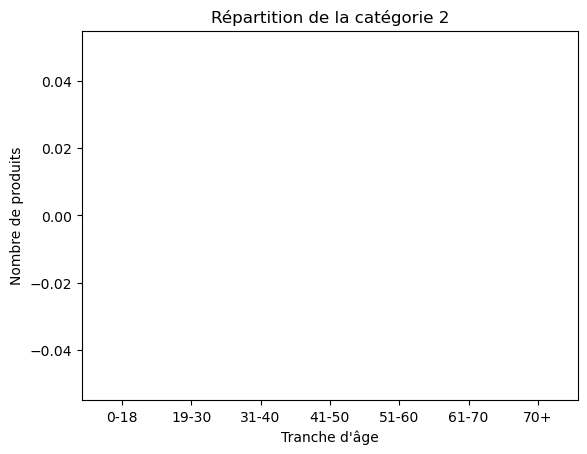

In [441]:
# Filtrer les données pour la catégorie 2
category_2 = dft[dft['categ'] == 2]

# Grouper les données par tranche d'âge et compter le nombre de produits dans chaque groupe
category_2_counts = category_2.groupby('tranche').count()['id_prod']

# Créer les positions des tranches d'âge sur l'axe x
x = np.arange(len(tranche_order))

# Créer la figure et l'axe
fig, ax = plt.subplots()

# Créer les barres
ax.bar(x, category_2_counts, width=0.5, color='green')

# Définir les étiquettes de l'axe x et le titre du graphique
ax.set_xticks(x)
ax.set_xticklabels(tranche_order)
ax.set_xlabel('Tranche d\'âge')
ax.set_ylabel('Nombre de produits')
ax.set_title('Répartition de la catégorie 2')

# Afficher le graphique
plt.show()


In [442]:
# Assurer que les données sont numériques et non NaN
dft['age'] = pd.to_numeric(dft['age'], errors='coerce')
dft['categ'] = pd.to_numeric(dft['categ'], errors='coerce')

# Supprimer les valeurs NaN qui ont pu être introduites par la conversion
dft = dft.dropna(subset=['age', 'categ'])

# Calculer la corrélation et la p-valeur
correlation, p_value = pearsonr(dft['age'], dft['categ'])
print('Correlation: ', correlation)
print('P-value: ', p_value)


Correlation:  -0.09829418011833728
P-value:  0.0


La corrélation entre l'âge des clients et la catégorie de livres achetés dans votre DataFrame dft est de -0.0983. Cela suggère une corrélation faible et négative entre ces deux variables. Le p-value est inférieur à 0.05, ce qui suggère que cette corrélation est statistiquement significative.

In [443]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Encoder les catégories en entiers
dft['categ_encoded'] = label_encoder.fit_transform(dft['categ'])

# Calculer la corrélation et la p-valeur avec les catégories encodées
correlation, p_value = pearsonr(dft['age'], dft['categ_encoded'])
print('Correlation: ', correlation)
print('P-value: ', p_value)


Correlation:  -0.09829418011833728
P-value:  0.0
